# Linear Regression

Linear regression is a simple model which assumes there is a linear relationship between the features and the targets. This relationship can be in any number of dimensions, but it must be linear in that dimensional space for linear regression to work well.

A linear regression model can be expressed in a simple formula that will take you back to high school algebra:

`y = mx + b`

In two dimensions x, y, m, and b are all single numbers. In multidimensional problems not much changes, we simply add more m's and x's — one for each feature in the training data:

`y = m1x1 + m2x2 + m3x3 ... mnxn + b`

Note that we still have only a single "intercept" but one coefficent (m) per input feature (x).

## An example:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## First lets create some random data between 0-1

In [2]:
rng = np.random.RandomState(12)
x = 10 * rng.rand(50) 
x

array([1.54162842, 7.40049697, 2.63315015, 5.33739393, 0.14574962,
       9.18747008, 9.00714854, 0.33421428, 9.56949336, 1.37209321,
       2.83828353, 6.06083184, 9.44225136, 8.52735541, 0.02259234,
       5.21226027, 5.52037633, 4.85377414, 7.68134154, 1.60716753,
       7.6456045 , 0.20809798, 1.35210178, 1.16273017, 3.09897584,
       6.71452645, 4.71229778, 8.16168298, 2.89586784, 7.33125978,
       7.02622355, 3.27569476, 3.34647529, 9.78058079, 6.24582112,
       9.50313525, 7.67475651, 8.25009253, 4.06640302, 4.51308411,
       4.00631627, 9.9513816 , 1.77564176, 9.62596903, 4.1925027 ,
       4.24052447, 4.6314887 , 3.73723149, 4.655081  , 0.35168261])

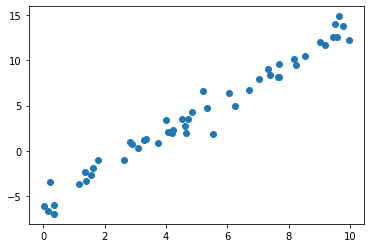

In [3]:
# Now, use that data as part of a linear equation, plus some random noise on each point.
y = 2 * x - 6 + rng.randn(50) 
plt.scatter(x, y);

## Note:

We created some syntetic data. This data is governed by the function `y = 2x - 6` with some small amount of noise thrown in. When we fit a linear regression model, we expect something very close to `m=2` and `b=-6`.

The random noise may pull those values slightly in one direction or another, but we should expect them to be close.

## Now, lets import and fit a model.

Because of the way SK learn works, we'll need to modify the shape of our data slightly. Currently we have x as a single list but because SK-Learn expects each "row" to be a single datapoint (possibly with many features) we need to switch our input data to be a "column vector."

That is, our x currently looks like:

```
[1, 2, 3, 4, 5 ... 10]
```

And we need it to look like:

```
[
    [1],
    [2],
    [3],
    [4],
    [5],
    ...
    [10]
]
```

The ultimate reason for this is, suppose we have a dataset with 3 features per datapoint, we could use:

```
[
    [1, 3, 7],
    [4, 6, 2],
    ...
    [9, 5, 7]
]
```

In [4]:
print(x.shape, '\n', x, '\n\n')

# This slightly funny syntax says, "Insert a dimension along the second axis"
# Which converts this array to a column vector format.
column_x = x[:, np.newaxis]
print(column_x.shape, '\n', column_x)

(50,) 
 [1.54162842 7.40049697 2.63315015 5.33739393 0.14574962 9.18747008
 9.00714854 0.33421428 9.56949336 1.37209321 2.83828353 6.06083184
 9.44225136 8.52735541 0.02259234 5.21226027 5.52037633 4.85377414
 7.68134154 1.60716753 7.6456045  0.20809798 1.35210178 1.16273017
 3.09897584 6.71452645 4.71229778 8.16168298 2.89586784 7.33125978
 7.02622355 3.27569476 3.34647529 9.78058079 6.24582112 9.50313525
 7.67475651 8.25009253 4.06640302 4.51308411 4.00631627 9.9513816
 1.77564176 9.62596903 4.1925027  4.24052447 4.6314887  3.73723149
 4.655081   0.35168261] 


(50, 1) 
 [[1.54162842]
 [7.40049697]
 [2.63315015]
 [5.33739393]
 [0.14574962]
 [9.18747008]
 [9.00714854]
 [0.33421428]
 [9.56949336]
 [1.37209321]
 [2.83828353]
 [6.06083184]
 [9.44225136]
 [8.52735541]
 [0.02259234]
 [5.21226027]
 [5.52037633]
 [4.85377414]
 [7.68134154]
 [1.60716753]
 [7.6456045 ]
 [0.20809798]
 [1.35210178]
 [1.16273017]
 [3.09897584]
 [6.71452645]
 [4.71229778]
 [8.16168298]
 [2.89586784]
 [7.33125978]


# Now the data has been reshaped, we can fit the model.

As usual, we just use the model.fit method.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(column_x, y)

# Note, one value because we have a single feature in each of our x datapoints!
print(model.coef_)

# Note, always one value, regardless of the shape of X
print(model.intercept_)
print()

# We can even be fancy and print out the formula that our model just found:
print(f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

[1.93665786]
-5.728259340779379

y = 1.94x + -5.73


## Note

Looks like it worked quite well! Our "true" slope was 2 and our "true" intercept was -6.

### A picture is worth a thousand words...

Lets plot our data along with the line we just created with the linear model!

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

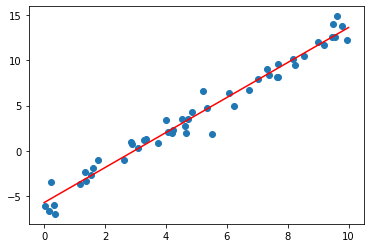

In [9]:
xfit = np.linspace(0, 10, 10)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
xfit

## Linear Model Assumptions

Linear Regression is widely used, but it relies on some assumptions about the data. ML Practitioners sometimes ignore a few of these assumptions, but for each one that is violated the model is likely to perform worse and worse. And, if the first assumption is violated the model is extremely likely to perform poorly.

### 1. The linear regression model is “linear in parameters.”

If the underlying relationship between your features and your targets is actually parabolic, a linear regressor won't model it well.

### 2. There is a random sampling of observations.

Meaning, there is no systemic bias in the sample with respect to the population. If you only sample health data from wealthy families your model won't work to predict health outcomes from poor families. The sample must accurately represent the population.


### 3. The conditional mean should be zero.

The conditional mean being zero means the expected value of the error is zero. Which essentially means our model should be predicting "too low" and "too high" equally as often and in similar magnitudes.

This also implies there is no correlation between the value of X and the error at that point. If the errors trend in one direction as X gets larger, this assumption is violated, and it means your model is probably missing something.

### 4. There is no multi-collinearity (or perfect collinearity).

If two or more of the features are perfectly correlated with each other linear regression has an infinte number of "correct" choices to model the coefficents for those two features, and it may choose really weird ones.

Say for example, that height and armspan are both inputs. These are strongly correlated. Assume the true relationship is: 

`y = M1*height + M2*armspan` where `M1 = 1, M2 = 1` 

Because height and armspan are so strongly correlated any M1 and M2 that "balance out" will always work, for example:

`M1 = 4 M2 = -2` or worse `M1 = 1000 M2 = -998`

With uncorrelated features this "balancing" can't be achieved quite so capriciously, it is the strong relationship between height and armspan that allows for this strange balancing.

### 5. There is no heteroscedasticity and no autocorrelation

Heteroscedasticity means errors are not randomly distributed, specifically that the spread of our errors is correlated with the features. For example, as we move up in X the spread of our errors increases as well. In a 2D scatterplot of the residuals heteroscedasticity looks like a cone.

Autocorrelation means errors are not randomly distributed, specifically that the error from one datapoint can be used to predict the error for another datapoint nearby in the feature-space. In a 2D scatterplot of the residuals autocorrelation usually looks like a repeating pattern (think sine wave).

### 6. There aren't many outliers, and the outliers are WAY out there

Outliers can mess with any model, but they are particularly rough on linear regression.

## A Final Note

Why is this considered Machine Learning? 

You might remember in a stats class from once upon a time that the Ordinary Least Squares regression line can be found using a closed form solution, and that's true! Even so, it's still a model built from data, not an expert system or some other form of traditional AI.

Additionally, with very large datasets with high dimenstionality it is usually faster to use some form of "gradient descent" rather than the closed form solution which is often more expensive to compute than finding a good approximation using gradient descent. 

Read more about gradient descent: [https://medium.com/tebs-lab/gradient-descent-604f6d6c116d](https://medium.com/tebs-lab/gradient-descent-604f6d6c116d)